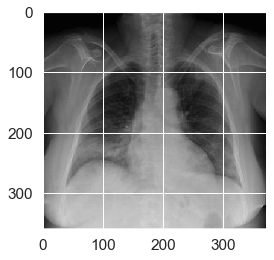

In [33]:
import cv2
import os
from tqdm import tqdm
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


DATADIR = "C:/Users/Sun of sadi/X-RAY COVID-19/COVID-19 Datasets"

CATEGORIES = ["COVID-19 Xray_Positive", "Normal_Xray"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to corpus file
    for img in os.listdir(path):  # iterate over each image per corpus labels
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break
    

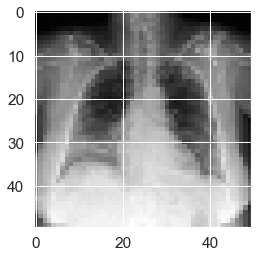

In [34]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [35]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 1575/1575 [01:24<00:00, 18.75it/s]


2134


In [36]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 13]
   [  5]
   [  5]
   ...
   [  5]
   [  5]
   [  6]]

  [[  2]
   [  3]
   [  3]
   ...
   [  3]
   [  3]
   [  4]]

  [[  2]
   [  3]
   [  3]
   ...
   [  3]
   [  3]
   [  4]]

  ...

  [[ 43]
   [118]
   [149]
   ...
   [ 91]
   [ 67]
   [ 42]]

  [[ 43]
   [ 66]
   [130]
   ...
   [ 95]
   [ 68]
   [ 39]]

  [[ 44]
   [ 72]
   [ 98]
   ...
   [101]
   [ 67]
   [ 39]]]]


In [37]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [38]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)



In [39]:
import tensorflow as tf
import numpy as np
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split


import pickle

In [40]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [41]:
X = X/255.0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [43]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

IMG_SIZE = 50

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

history =model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 1493 samples, validate on 641 samples
Epoch 1/3
1493/1493 [==============================] - ETA: 1:21 - loss: 0.6997 - accuracy: 0.40 - ETA: 1:05 - loss: 2.1066 - accuracy: 0.45 - ETA: 58s - loss: 1.6070 - accuracy: 0.5208 - ETA: 57s - loss: 1.4306 - accuracy: 0.468 - ETA: 56s - loss: 1.2935 - accuracy: 0.431 - ETA: 55s - loss: 1.1852 - accuracy: 0.468 - ETA: 54s - loss: 1.1132 - accuracy: 0.482 - ETA: 52s - loss: 1.0487 - accuracy: 0.500 - ETA: 52s - loss: 1.0000 - accuracy: 0.506 - ETA: 50s - loss: 0.9595 - accuracy: 0.509 - ETA: 48s - loss: 0.9221 - accuracy: 0.545 - ETA: 47s - loss: 0.8855 - accuracy: 0.572 - ETA: 45s - loss: 0.8432 - accuracy: 0.598 - ETA: 43s - loss: 0.8287 - accuracy: 0.593 - ETA: 42s - loss: 0.7919 - accuracy: 0.618 - ETA: 40s - loss: 0.7641 - accuracy: 0.636 - ETA: 39s - loss: 0.7334 - accuracy: 0.654 - ETA: 37s - loss: 0.7089 - accuracy: 0.666 - ETA: 36s - loss: 0.6835 - accuracy: 0.679 - ETA: 34s - loss: 0.6596 - accuracy: 0.690 - ETA: 33s - loss: 

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred =model.predict_classes(X_test)
accuracy_score (y_test, y_pred)

0.9672131147540983

In [46]:
history.history


{'loss': [0.3462644929524164, 0.11131691853456543, 0.0941619568492541],
 'accuracy': [0.8425988, 0.96048224, 0.96182185],
 'val_loss': [0.11284517225999728, 0.267670834910665, 0.212545740715985],
 'val_accuracy': [0.96879876, 0.9048362, 0.94071764]}

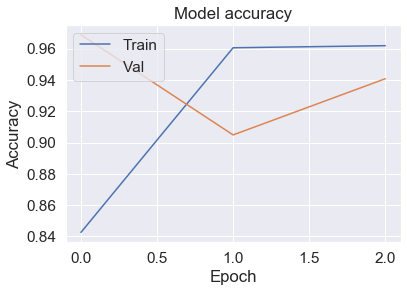

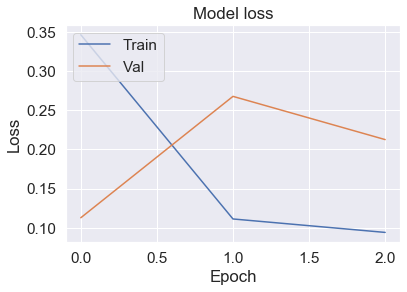

In [47]:
#plot training validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot training validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [48]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [49]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
CATEGORIES = ["COVID-19 Xray_Positive", "Normal_Xray"]

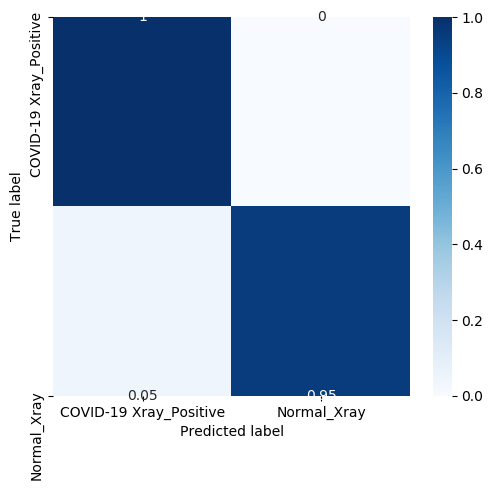

In [51]:
import seaborn as sns
import pandas as pd

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = CATEGORIES, 
                     columns = CATEGORIES)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()